<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/unsupervised/clustering/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0,8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1','x2'])

px.scatter(df, 'x1','x2',width=950, height=500, title='Algorytm K-srednich', template='plotly_dark')

###Algorytm k-srednich

In [3]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [4]:
# wcss - skumulowana suma odległości
kmeans.inertia_

3872.9072198031645

In [5]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,2
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,3
4,3.322516,-0.676179,3


In [6]:
px.scatter(df,'x1','x2', 'y_kmeans', width=950, height=500,title='Algorytm k-srednich - 5 klastrow', template='plotly_dark')

###WCSS - Within-Cluster Sum-of-Squared

In [8]:
wcss = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695978, 7734.886635126091, 4282.137026938605, 3872.888282009291, 3578.010892311981, 3090.653982688178, 2980.0335474426474, 2708.338407991653]


In [9]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3872.888282
4,5,3578.010892


###Metoda łokcia - Elbow Method

In [10]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')

###Wizualizacja klastrów

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-srednich - 3 klastry',
           template='plotly_dark')

In [12]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1','c2'])
centers

,c1,c2
0,-5.302413,-5.404200
1,-4.678306,6.633539
2,3.630348,1.808377


In [14]:
fig = px.scatter(df,'x1','x2','y_kmeans',width=950,height=500,
                 title='Algorytm K-srednich - 3 klastry', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers',
                         marker={'size':12, 'color':'LightSkyBlue', 'line': {'width':2,'color':'tomato'}},
                         showlegend=False))
fig.show()

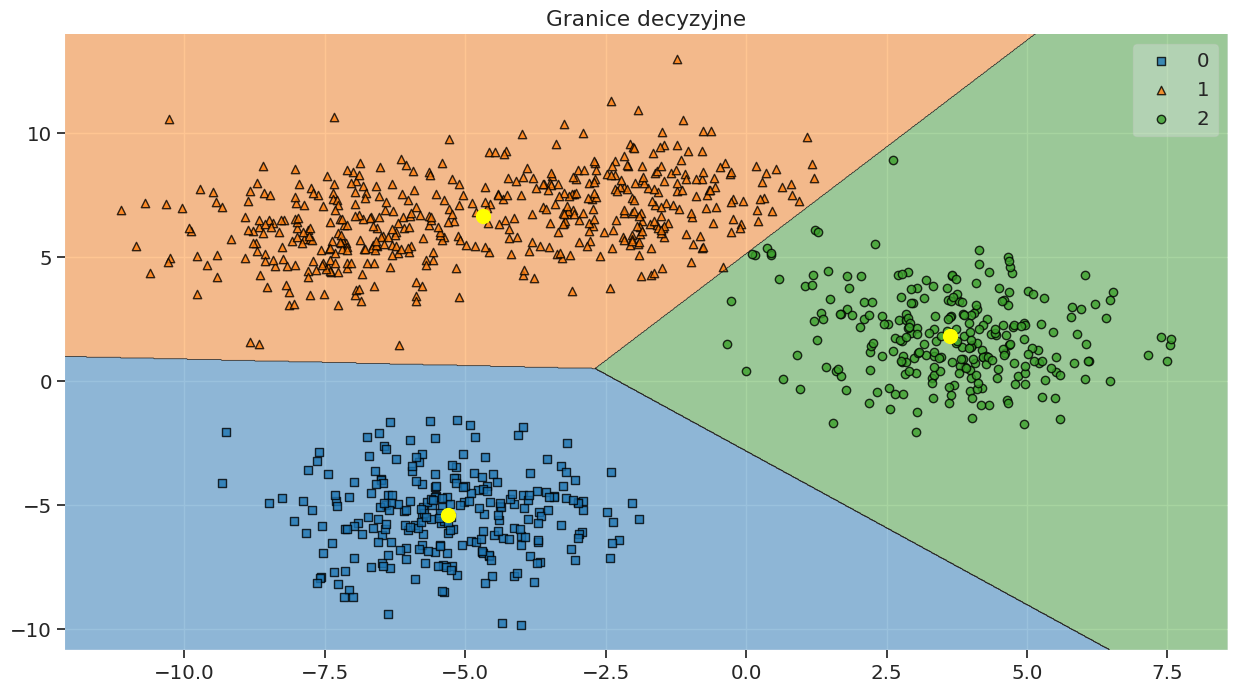

In [15]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15,8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow')
plt.show()